# Estimators Plotting

This is a simple notebook displaying some of the estimators specific visualisation functionalities available in `aeon`.

This is in-progress, and does not contain detailed descriptions and documentation yet.

### CLaSP Segmenter

`plot_series_with_profiles` is used  to plot a time series along with its profiles (e.g., ClaSP scores) and highlight true and predicted change points. This function is particularly useful for analyzing and interpreting the results of change point detection algorithms.

In [1]:
import pandas as pd

from aeon.datasets import load_electric_devices_segmentation
from aeon.segmentation import ClaSPSegmenter
from aeon.visualisation import plot_series_with_profiles

In [2]:
ts, period_size, true_cps = load_electric_devices_segmentation()

In [3]:
pd.DataFrame(ts)

,1
0,
1,-0.187086
2,0.098119
3,0.088967
4,0.107328
5,-0.193514
...,...
11528,0.300240
11529,0.200745
11530,-0.548908


In [4]:
clasp = ClaSPSegmenter(period_length=period_size, n_cps=5)
found_cps = clasp.fit_predict(ts)
profiles = clasp.profiles
scores = clasp.scores
print("The found change points are", found_cps)

The found change points are [1038 4525 5719 7883]


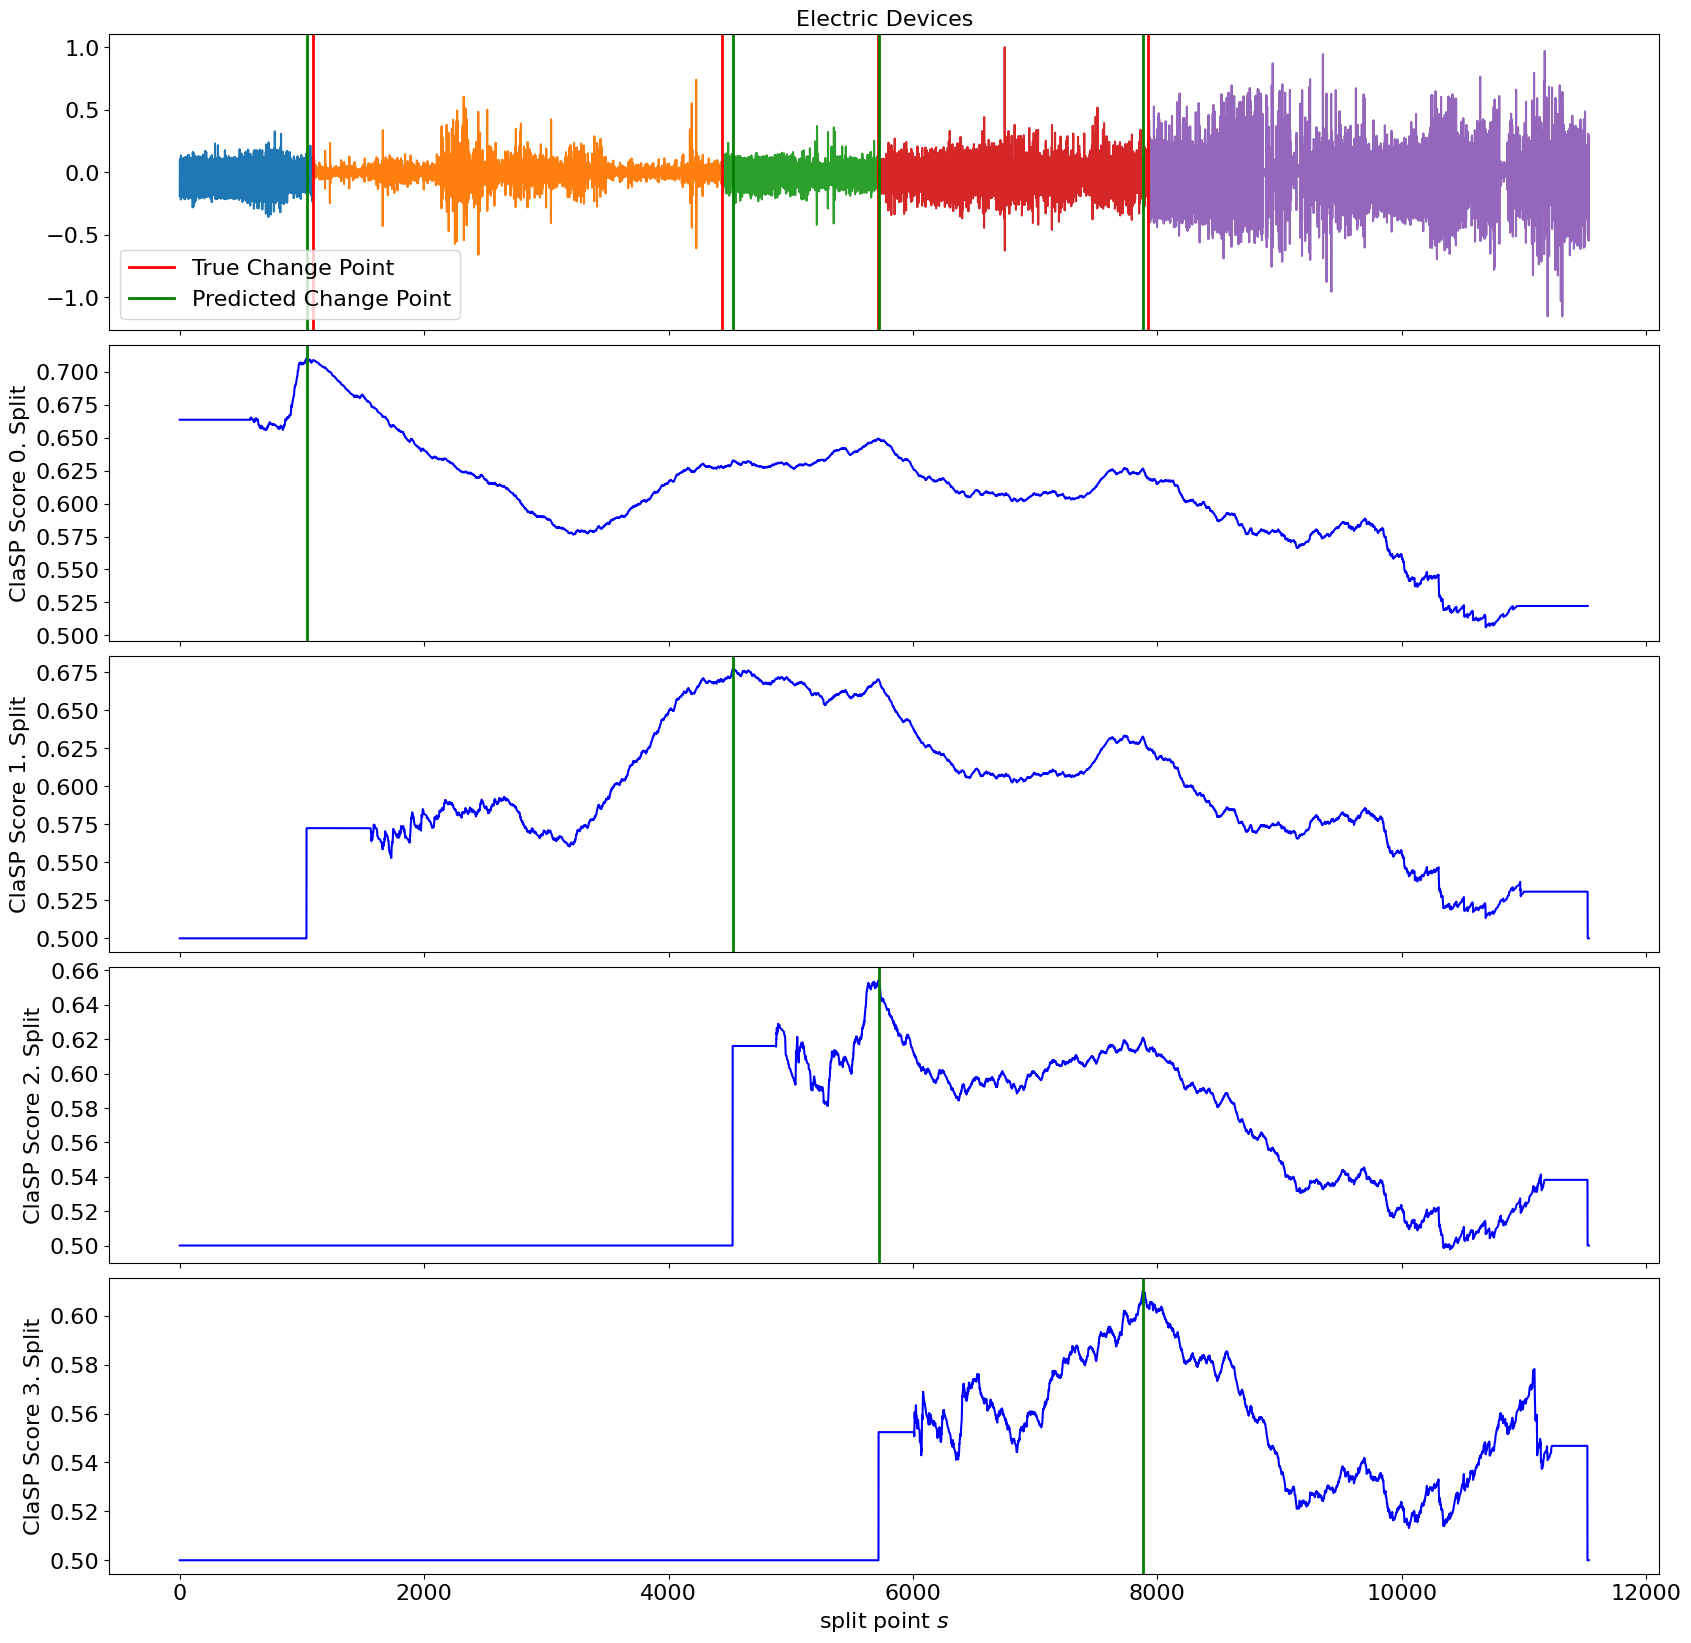

In [5]:
_ = plot_series_with_profiles(
    ts,
    profiles,
    true_cps=true_cps,
    found_cps=found_cps,
    title="Electric Devices",
)

### Clustering

`plot_cluster_algorithm` function is designed to visualize the clustering results of a time series dataset using a given clustering algorithm. It provides insights into how the data points are grouped into clusters and displays the cluster centers alongside the associated time series.

In this notebook we will test `TimeSeriesKMeans` and `TimeSeriesKMediods` clustering algorithms, you can look at all the different algorithms.

In [6]:
from aeon.clustering import TimeSeriesKMeans, TimeSeriesKMedoids
from aeon.datasets import load_arrow_head
from aeon.visualisation import plot_cluster_algorithm, plot_series_collection

In [7]:
X_train, y_train = load_arrow_head(return_type="numpy3D", split="train")
X_test, y_test = load_arrow_head(return_type="numpy3D", split="test")

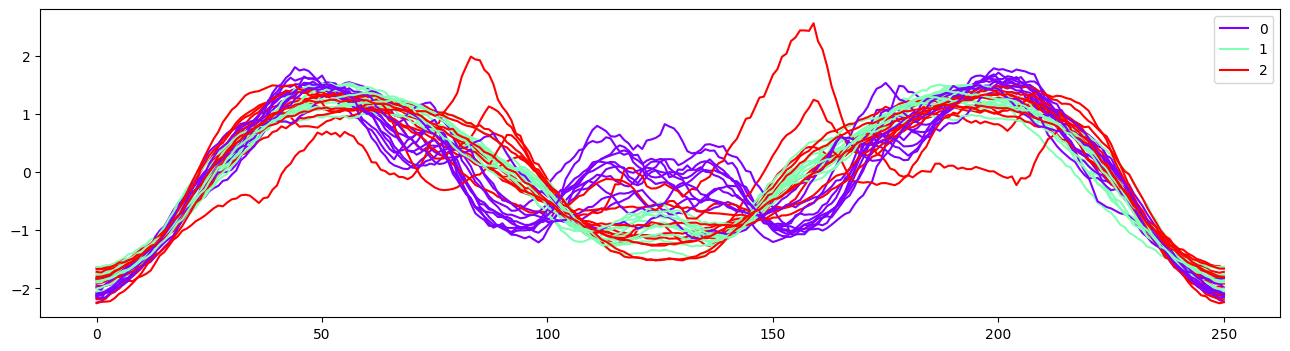

In [8]:
_ = plot_series_collection(X_train, y_train)

In [11]:
print(f"Train Data shape: {X_train.shape}")
print(f"Test Data shape: {X_test.shape}")

Train Data shape: (36, 1, 251)
Test Data shape: (175, 1, 251)


In [12]:
kmeans = TimeSeriesKMeans(n_clusters=3, distance="dtw", max_iter=10)
kmeans.fit(X_train)

TimeSeriesKMeans(distance='dtw', max_iter=10, n_clusters=3)

In [13]:
y_pred = kmeans.predict(X_test)

In [14]:
y_pred

array([0, 0, 2, 2, 2, 0, 0, 1, 2, 0, 2, 0, 0, 2, 0, 1, 2, 2, 0, 2, 1, 2,
       2, 0, 1, 1, 2, 2, 0, 1, 0, 2, 0, 1, 2, 2, 0, 2, 2, 0, 0, 0, 0, 1,
       2, 2, 0, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 0, 0, 0, 0, 0, 0, 2, 0,
       2, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

(<Figure size 640x480 with 3 Axes>,
 array([<Axes: >, <Axes: >, <Axes: >], dtype=object))

<Figure size 500x1000 with 0 Axes>

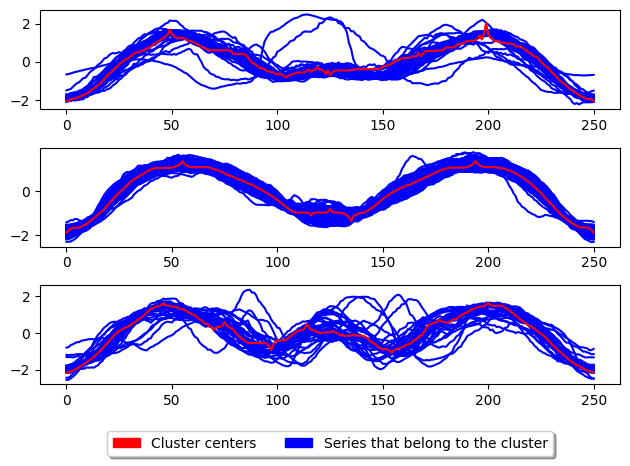

In [15]:
plot_cluster_algorithm(kmeans, X_test, 3)

In [16]:
kmedoids = TimeSeriesKMedoids(n_clusters=4, distance="dtw", max_iter=5)
kmedoids.fit(X_train)

/home/kaustubh/opensource/Aeon/aeon/aeon/clustering/_k_medoids.py:316: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


TimeSeriesKMedoids(distance='dtw', max_iter=5, n_clusters=4)

In [17]:
y_pred = kmedoids.predict(X_test)
y_pred

array([3, 3, 0, 0, 0, 3, 3, 3, 0, 3, 0, 0, 0, 0, 3, 3, 1, 0, 3, 0, 3, 0,
       0, 3, 3, 3, 0, 0, 3, 3, 3, 0, 3, 3, 0, 0, 3, 0, 0, 1, 3, 3, 0, 3,
       1, 0, 3, 3, 0, 0, 0, 0, 3, 3, 0, 2, 0, 3, 0, 0, 0, 0, 3, 3, 0, 3,
       0, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 0, 2, 3, 2, 3, 0,
       3, 3, 2, 0, 2, 3, 3, 3, 2, 2, 2, 3, 3, 3, 2, 3, 2, 3, 2, 2, 2, 2,
       2, 3, 3, 3, 2, 2, 2, 0, 3, 3, 2, 3, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2,
       2, 1, 3, 2, 2, 2, 3, 3, 2, 2, 3, 3, 3, 2, 2, 3, 2, 0, 3, 3, 2, 2,
       2, 2, 3, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2])

(<Figure size 640x480 with 4 Axes>,
 array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object))

<Figure size 500x1000 with 0 Axes>

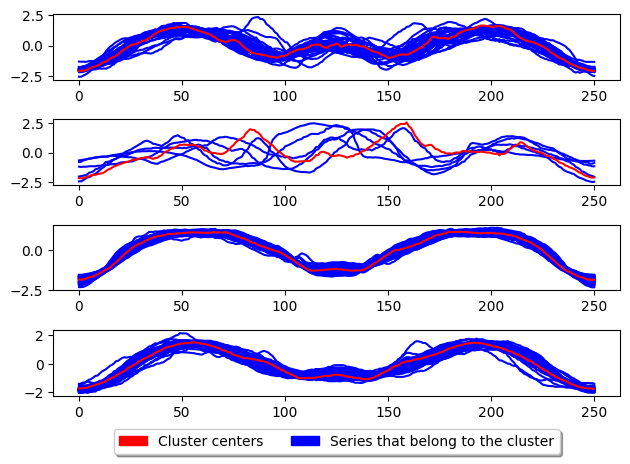

In [18]:
plot_cluster_algorithm(kmedoids, X_test, 4)

### Deep Learning Networks

`plot_network` function provides visualization capabilities for neural network architectures in aeon, generating PDF diagrams of network structures. It's particularly useful for understanding complex model architectures and debugging network designs.
The plot_network function is designed to visualize the architecture of a neural network, including its layers, input-output shapes, and activations. For training purposes use deep learning models from `Classification` and `Regression` 

In [21]:
from aeon.networks import MLPNetwork, TimeCNNNetwork
from aeon.visualisation import plot_network

In [22]:
mlp = MLPNetwork(
    n_layers=4,
    n_units=300,
    activation=["sigmoid", "relu", "tanh", "relu"],
    dropout_rate=0.4,
)

The output of the below plot will be saved in "model.pdf" by default

In [24]:
plot_network(input_shape=(2, 12), network=mlp, show_layer_names=True)

In [25]:
cnn = TimeCNNNetwork(n_layers=2, n_filters=16, kernel_size=14, activation="relu")

In [26]:
plot_network(input_shape=(12, 24), network=cnn, show_layer_names=True)

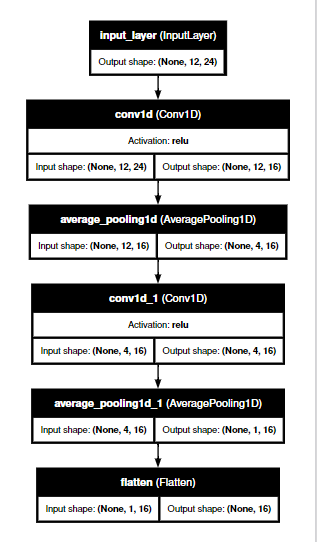

### Temporal Importance Curves

`plot_temporal_importance_curves` generates a line plot that visualizes the temporal importance curves for each feature (attribute) in a time series classification model, particularly used with interval forests in Aeon. These curves reflect how much each feature contributes to the model’s decisions over different time points.

In [27]:
from aeon.classification.interval_based import (
    CanonicalIntervalForestClassifier,
    IntervalForestClassifier,
)
from aeon.classification.sklearn import ContinuousIntervalTree
from aeon.datasets import load_arrow_head, load_italy_power_demand
from aeon.visualisation import plot_temporal_importance_curves

In [28]:
X_train, y_train = load_arrow_head(return_type="numpy3D", split="train")
X_test, y_test = load_arrow_head(return_type="numpy3D", split="test")

In [31]:
clf = IntervalForestClassifier(
    base_estimator=ContinuousIntervalTree(), interval_selection_method="supervised"
)

In [32]:
clf.fit(X_train, y_train)

IntervalForestClassifier(base_estimator=ContinuousIntervalTree(),
                         interval_selection_method='supervised')

In [33]:
y_pred = clf.predict(X_test)

In [34]:
y_pred

array(['0', '2', '0', '0', '0', '0', '2', '2', '2', '0', '0', '0', '0',
       '0', '2', '2', '2', '0', '2', '0', '2', '0', '0', '2', '1', '1',
       '0', '0', '1', '1', '0', '0', '2', '0', '0', '0', '0', '0', '0',
       '0', '0', '2', '0', '2', '0', '0', '0', '1', '0', '0', '0', '0',
       '2', '0', '0', '2', '0', '2', '0', '0', '2', '0', '0', '0', '0',
       '2', '0', '1', '0', '2', '1', '1', '1', '2', '1', '1', '1', '1',
       '1', '0', '1', '1', '0', '1', '1', '2', '1', '0', '1', '1', '1',
       '0', '1', '1', '1', '0', '2', '1', '1', '1', '2', '1', '1', '1',
       '1', '1', '2', '1', '2', '1', '1', '2', '1', '1', '1', '1', '1',
       '0', '2', '1', '1', '2', '1', '1', '2', '2', '1', '1', '2', '2',
       '2', '2', '2', '0', '2', '1', '2', '2', '2', '2', '1', '1', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '1', '2', '1',
       '2', '2', '2', '2', '1', '0', '2', '1', '2', '2', '2', '1', '2',
       '2', '2', '1', '2', '2', '1'], dtype='<U1')

In [35]:
names, curves = clf.temporal_importance_curves()

In [36]:
names

('row_mean', 'row_slope', 'row_std')

(<Figure size 685.714x480 with 1 Axes>,
 <Axes: xlabel='Time Point', ylabel='Information Gain'>)

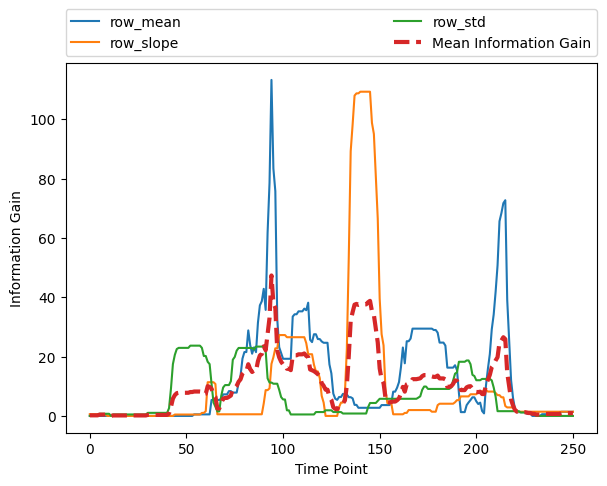

In [37]:
plot_temporal_importance_curves(curves, names)

In [38]:
X_train, y_train = load_italy_power_demand(return_type="numpy3D", split="train")
X_test, y_test = load_italy_power_demand(return_type="numpy3D", split="test")

In [39]:
clf2 = CanonicalIntervalForestClassifier(base_estimator=ContinuousIntervalTree())

In [40]:
clf2.fit(X_train, y_train)

CanonicalIntervalForestClassifier(base_estimator=ContinuousIntervalTree())

In [41]:
y_pred = clf2.predict(X_test)

In [42]:
y_pred

array(['2', '2', '2', ..., '2', '2', '2'], dtype='<U1')

In [43]:
names, curves = clf2.temporal_importance_curves()

In [44]:
names

('CO_Embed2_Dist_tau_d_expfit_meandiff',
 'CO_FirstMin_ac',
 'CO_HistogramAMI_even_2_5',
 'CO_f1ecac',
 'CO_trev_1_num',
 'DN_HistogramMode_10',
 'DN_HistogramMode_5',
 'DN_OutlierInclude_n_001_mdrmd',
 'DN_OutlierInclude_p_001_mdrmd',
 'FC_LocalSimple_mean1_tauresrat',
 'FC_LocalSimple_mean3_stderr',
 'IN_AutoMutualInfoStats_40_gaussian_fmmi',
 'MD_hrv_classic_pnn40',
 'PD_PeriodicityWang_th0_01',
 'SB_BinaryStats_diff_longstretch0',
 'SB_BinaryStats_mean_longstretch1',
 'SB_MotifThree_quantile_hh',
 'SB_TransitionMatrix_3ac_sumdiagcov',
 'SP_Summaries_welch_rect_area_5_1',
 'SP_Summaries_welch_rect_centroid',
 'row_mean',
 'row_slope',
 'row_std')

(<Figure size 685.714x480 with 1 Axes>,
 <Axes: xlabel='Time Point', ylabel='Information Gain'>)

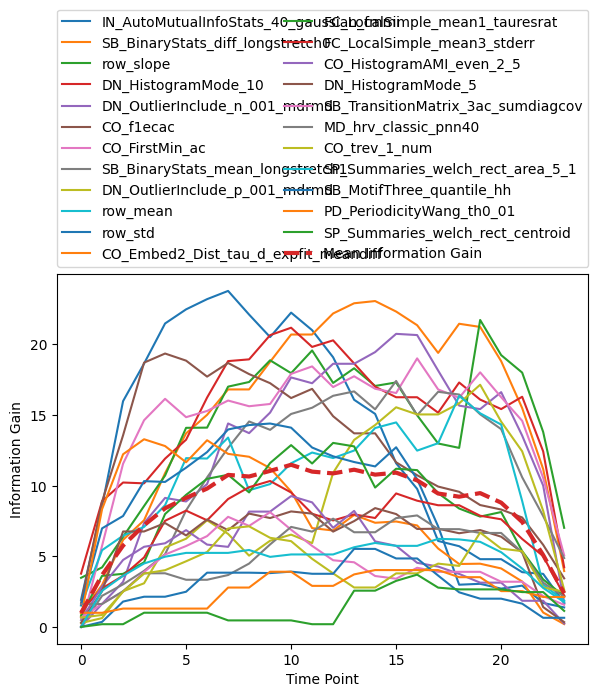

In [45]:
plot_temporal_importance_curves(curves, names)